In [ ]:
# pip install NeuralForecast

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models import NHITS
from neuralforecast import NeuralForecast
from neuralforecast.core import NeuralForecast
from neuralforecast.models import Informer, Autoformer,NHITS
from neuralforecast.models import NBEATS,FEDformer
from neuralforecast.losses.numpy import mae,mse


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# X_df = pd.read_csv('/content/df_x.csv')
# Y_df = pd.read_csv('/content/df_y.csv')

# X_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ili/M/df_x.csv')
# Y_df = pd.read_csv('/content/drive/MyDrive/AML Reproducibility Challenge/datasets/ili/M/df_y.csv')

X_df = pd.read_csv('@datasets_reproducibity/ili/M/df_x.csv')
Y_df = pd.read_csv('@datasets_reproducibity/ili/M/df_y.csv')

In [ ]:
X_df

,ds,ex_1,ex_2,ex_3,ex_4
0,2002-01-01,-0.5,-0.333333,-0.500000,-0.500000
1,2002-01-08,-0.5,-0.333333,-0.266667,-0.480822
2,2002-01-15,-0.5,-0.333333,-0.033333,-0.461644
3,2002-01-22,-0.5,-0.333333,0.200000,-0.442466
4,2002-01-29,-0.5,-0.333333,0.433333,-0.423288
...,...,...,...,...,...
961,2020-06-02,-0.5,-0.333333,-0.466667,-0.080822
962,2020-06-09,-0.5,-0.333333,-0.233333,-0.061644
963,2020-06-16,-0.5,-0.333333,0.000000,-0.042466
964,2020-06-23,-0.5,-0.333333,0.233333,-0.023288


In [ ]:
Y_df

,ds,unique_id,y
0,2002-01-01,% WEIGHTED ILI,-0.421499
1,2002-01-01,%UNWEIGHTED ILI,-0.472442
2,2002-01-01,AGE 0-4,-0.981641
3,2002-01-01,AGE 5-24,-0.692621
4,2002-01-01,ILITOTAL,-0.819695
...,...,...,...
6757,2020-06-30,AGE 0-4,0.602263
6758,2020-06-30,AGE 5-24,0.023051
6759,2020-06-30,ILITOTAL,0.651678
6760,2020-06-30,NUM. OF PROVIDERS,3.454565


In [ ]:
a=Y_df['unique_id'].unique()
a.size

7

In [ ]:
merged_df = pd.merge(Y_df, X_df[['ds', 'ex_1', 'ex_2','ex_3','ex_4']], on='ds', how='left')
merged_df

,ds,unique_id,y,ex_1,ex_2,ex_3,ex_4
0,2002-01-01,% WEIGHTED ILI,-0.421499,-0.5,-0.333333,-0.500000,-0.50000
1,2002-01-01,%UNWEIGHTED ILI,-0.472442,-0.5,-0.333333,-0.500000,-0.50000
2,2002-01-01,AGE 0-4,-0.981641,-0.5,-0.333333,-0.500000,-0.50000
3,2002-01-01,AGE 5-24,-0.692621,-0.5,-0.333333,-0.500000,-0.50000
4,2002-01-01,ILITOTAL,-0.819695,-0.5,-0.333333,-0.500000,-0.50000
...,...,...,...,...,...,...,...
6757,2020-06-30,AGE 0-4,0.602263,-0.5,-0.333333,0.466667,-0.00411
6758,2020-06-30,AGE 5-24,0.023051,-0.5,-0.333333,0.466667,-0.00411
6759,2020-06-30,ILITOTAL,0.651678,-0.5,-0.333333,0.466667,-0.00411
6760,2020-06-30,NUM. OF PROVIDERS,3.454565,-0.5,-0.333333,0.466667,-0.00411


In [ ]:
filtered_df = merged_df[merged_df['unique_id'] == 'OT']
filtered_df.reset_index(drop=True, inplace=True)
filtered_df.drop("ds",axis=1,inplace=True)
filtered_df['ds'] = range(len(filtered_df))
Y_df=filtered_df
Y_df

/tmp/ipykernel_9439/786084273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop("ds",axis=1,inplace=True)
/tmp/ipykernel_9439/786084273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ds'] = range(len(filtered_df))


,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


## Horizon 24

In [ ]:
Y_df=filtered_df

In [ ]:
Y_train_df = Y_df.iloc[:942,:]
Y_test_df = Y_df.iloc[942:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,942,OT,4.744937,-0.5,-0.333333,0.166667,-0.445205,942
1,943,OT,4.676394,-0.5,-0.333333,0.400000,-0.426027,943
2,944,OT,4.841205,-0.5,-0.333333,-0.400000,-0.406849,944
3,945,OT,5.012764,-0.5,-0.333333,-0.166667,-0.387671,945
4,946,OT,4.792059,-0.5,-0.333333,0.066667,-0.368493,946
5,947,OT,4.062765,-0.5,-0.333333,0.300000,-0.349315,947
6,948,OT,4.559790,-0.5,-0.333333,-0.433333,-0.330137,948
7,949,OT,4.628376,-0.5,-0.333333,-0.200000,-0.310959,949
8,950,OT,4.362484,-0.5,-0.333333,0.033333,-0.291781,950
9,951,OT,3.791576,-0.5,-0.333333,0.266667,-0.272603,951


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,4.744937,-0.5,-0.333333,0.166667,-0.445205,942
1,OT,4.676394,-0.5,-0.333333,0.400000,-0.426027,943
2,OT,4.841205,-0.5,-0.333333,-0.400000,-0.406849,944
3,OT,5.012764,-0.5,-0.333333,-0.166667,-0.387671,945
4,OT,4.792059,-0.5,-0.333333,0.066667,-0.368493,946
5,OT,4.062765,-0.5,-0.333333,0.300000,-0.349315,947
6,OT,4.559790,-0.5,-0.333333,-0.433333,-0.330137,948
7,OT,4.628376,-0.5,-0.333333,-0.200000,-0.310959,949
8,OT,4.362484,-0.5,-0.333333,0.033333,-0.291781,950
9,OT,3.791576,-0.5,-0.333333,0.266667,-0.272603,951


In [ ]:
horizon = 24
model = Autoformer(h=horizon,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=200
                   )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2024-04-20 03:08:34.514113: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 03:08:34.543346: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when 

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |                                                                                     | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=200` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Autoformer
unique_id,,
OT,0,3.745355
OT,1,3.509332
OT,2,3.370158
OT,3,3.257719
OT,4,3.262276
OT,5,3.345100
OT,6,3.486442
OT,7,3.646391
OT,8,3.754596


<Axes: xlabel='ds'>

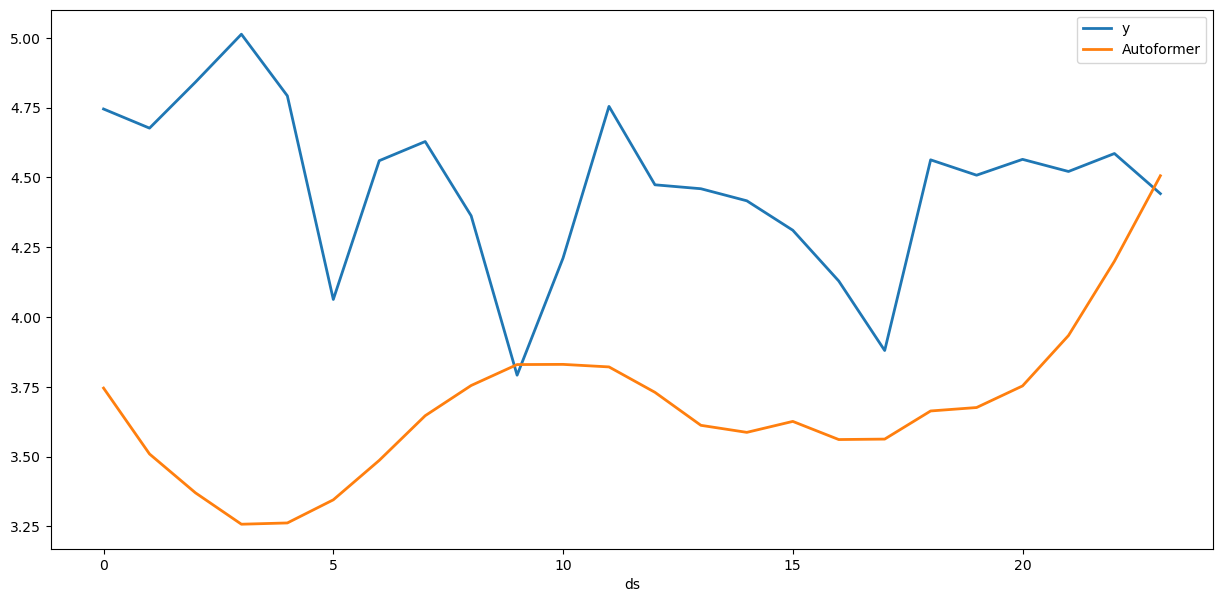

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Autoformer
ds,
0,3.745355
1,3.509332
2,3.370158
3,3.257719
4,3.262276
5,3.345100
6,3.486442
7,3.646391
8,3.754596


In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

Autoformer MAE: 0.801
Autoformer MSE: 0.811


## Horizon 36

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:930,:]
Y_test_df = Y_df.iloc[930:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,930,OT,3.728859,-0.5,-0.333333,0.433333,0.324658,930
1,931,OT,3.669735,-0.5,-0.333333,-0.366667,0.343836,931
2,932,OT,3.693310,-0.5,-0.333333,-0.133333,0.363014,932
3,933,OT,3.716836,-0.5,-0.333333,0.100000,0.382192,933
4,934,OT,3.747381,-0.5,-0.333333,0.333333,0.401370,934
5,935,OT,3.683140,-0.5,-0.333333,-0.433333,0.420548,935
6,936,OT,3.641755,-0.5,-0.333333,-0.200000,0.439726,936
7,937,OT,3.783136,-0.5,-0.333333,0.033333,0.458904,937
8,938,OT,3.948533,-0.5,-0.333333,0.266667,0.478082,938
9,939,OT,4.571083,-0.5,-0.333333,0.500000,0.497260,939


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,3.728859,-0.5,-0.333333,0.433333,0.324658,930
1,OT,3.669735,-0.5,-0.333333,-0.366667,0.343836,931
2,OT,3.693310,-0.5,-0.333333,-0.133333,0.363014,932
3,OT,3.716836,-0.5,-0.333333,0.100000,0.382192,933
4,OT,3.747381,-0.5,-0.333333,0.333333,0.401370,934
5,OT,3.683140,-0.5,-0.333333,-0.433333,0.420548,935
6,OT,3.641755,-0.5,-0.333333,-0.200000,0.439726,936
7,OT,3.783136,-0.5,-0.333333,0.033333,0.458904,937
8,OT,3.948533,-0.5,-0.333333,0.266667,0.478082,938
9,OT,4.571083,-0.5,-0.333333,0.500000,0.497260,939


In [ ]:
horizon = 36
model = Autoformer(h=horizon,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=100
                   )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2024-04-20 03:16:03.469103: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 03:16:03.497496: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when 

Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:77: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 1. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=100` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Autoformer
unique_id,,
OT,0,4.371482
OT,1,3.911770
OT,2,3.745669
OT,3,3.738911
OT,4,3.844676
OT,5,3.023899
OT,6,1.566088
OT,7,1.518698
OT,8,2.574629


<Axes: xlabel='ds'>

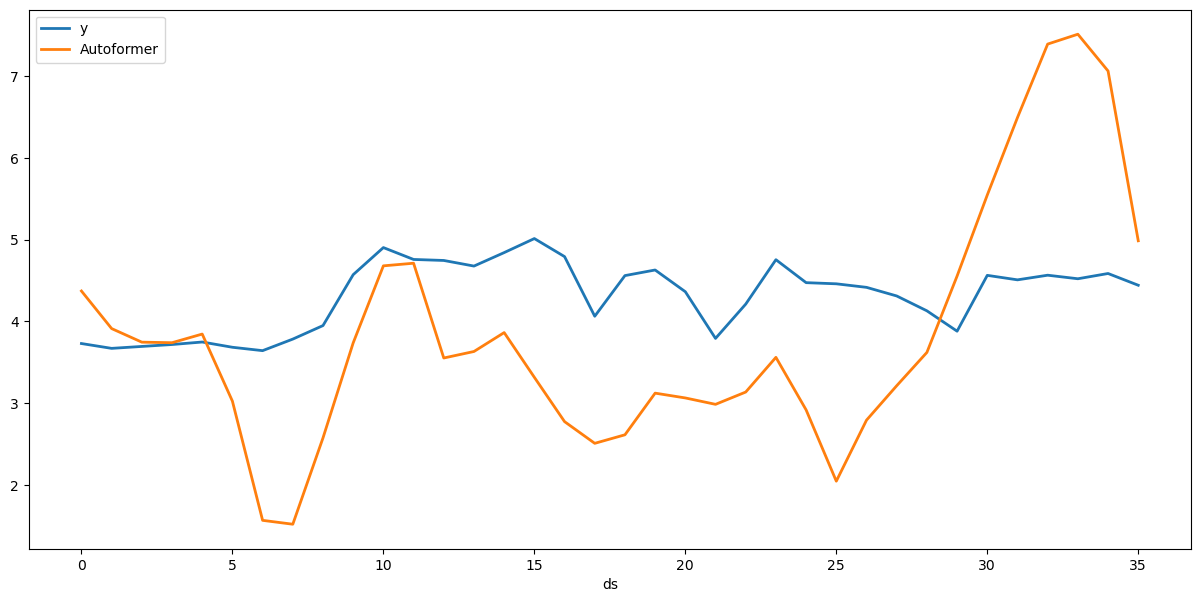

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Autoformer
ds,
0,4.371482
1,3.911770
2,3.745669
3,3.738911
4,3.844676
5,3.023899
6,1.566088
7,1.518698
8,2.574629


In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

Autoformer MAE: 1.237
Autoformer MSE: 2.164


## Horizon 48

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:918,:]
Y_test_df = Y_df.iloc[918:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,918,OT,1.416744,-0.5,-0.333333,-0.333333,0.094521,918
1,919,OT,1.542186,-0.5,-0.333333,-0.100000,0.113699,919
2,920,OT,2.474883,-0.5,-0.333333,0.133333,0.132877,920
3,921,OT,2.571790,-0.5,-0.333333,0.366667,0.152055,921
4,922,OT,2.803050,-0.5,-0.333333,-0.433333,0.171233,922
5,923,OT,2.975925,-0.5,-0.333333,-0.200000,0.190411,923
6,924,OT,3.293017,-0.5,-0.333333,0.033333,0.209589,924
7,925,OT,3.468571,-0.5,-0.333333,0.266667,0.228767,925
8,926,OT,3.469169,-0.5,-0.333333,-0.500000,0.247945,926
9,927,OT,3.786624,-0.5,-0.333333,-0.266667,0.267123,927


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,1.416744,-0.5,-0.333333,-0.333333,0.094521,918
1,OT,1.542186,-0.5,-0.333333,-0.100000,0.113699,919
2,OT,2.474883,-0.5,-0.333333,0.133333,0.132877,920
3,OT,2.571790,-0.5,-0.333333,0.366667,0.152055,921
4,OT,2.803050,-0.5,-0.333333,-0.433333,0.171233,922
5,OT,2.975925,-0.5,-0.333333,-0.200000,0.190411,923
6,OT,3.293017,-0.5,-0.333333,0.033333,0.209589,924
7,OT,3.468571,-0.5,-0.333333,0.266667,0.228767,925
8,OT,3.469169,-0.5,-0.333333,-0.500000,0.247945,926
9,OT,3.786624,-0.5,-0.333333,-0.266667,0.267123,927


In [ ]:
horizon = 48
model = Autoformer(h=horizon,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=100
                   )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 148 K 
7 | decoder       | Decoder       | 141 K 
------------------------------------------------
290 K     Trainable params
0         Non-trainable params
290 K     Total params
1.162     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=100` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Autoformer
unique_id,,
OT,0,5.805481
OT,1,5.619571
OT,2,5.666924
OT,3,5.852270
OT,4,6.001917
OT,5,5.989814
OT,6,5.520295
OT,7,4.586742
OT,8,4.021016


<Axes: xlabel='ds'>

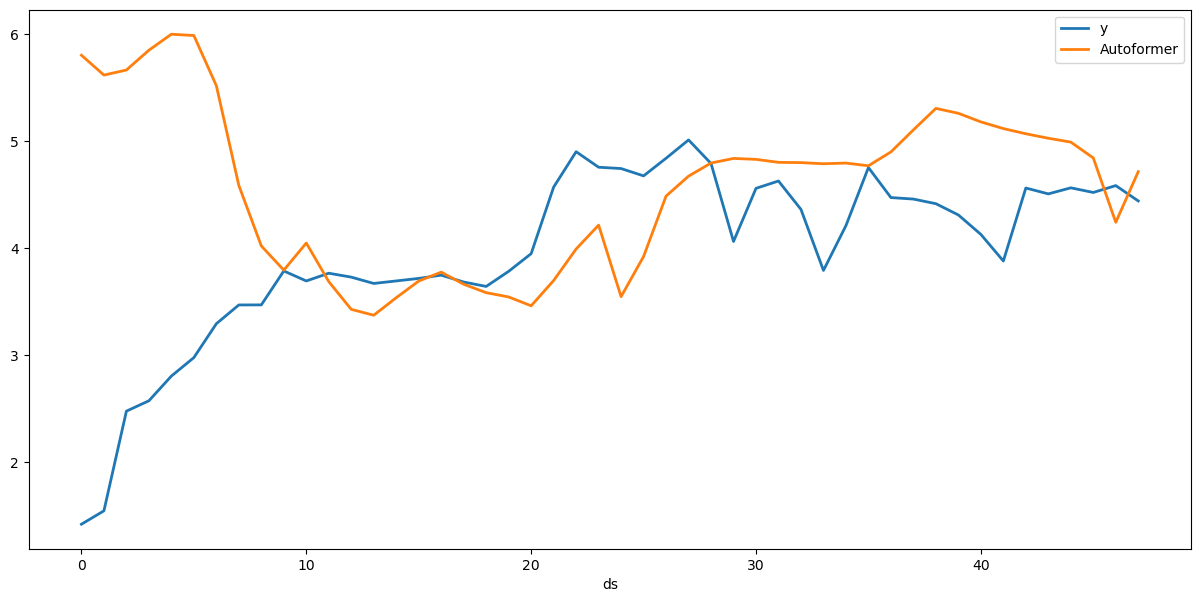

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Autoformer
ds,
0,5.805481
1,5.619571
2,5.666924
3,5.852270
4,6.001917
5,5.989814
6,5.520295
7,4.586742
8,4.021016


In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

Autoformer MAE: 0.895
Autoformer MSE: 1.992


## Horizon 60

In [ ]:
Y_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,-1.385709,-0.5,-0.333333,-0.500000,-0.500000,0
1,OT,-1.342939,-0.5,-0.333333,-0.266667,-0.480822,1
2,OT,-1.316218,-0.5,-0.333333,-0.033333,-0.461644,2
3,OT,-1.250473,-0.5,-0.333333,0.200000,-0.442466,3
4,OT,-1.181873,-0.5,-0.333333,0.433333,-0.423288,4
...,...,...,...,...,...,...,...
961,OT,4.507846,-0.5,-0.333333,-0.466667,-0.080822,961
962,OT,4.564575,-0.5,-0.333333,-0.233333,-0.061644,962
963,OT,4.521154,-0.5,-0.333333,0.000000,-0.042466,963
964,OT,4.585444,-0.5,-0.333333,0.233333,-0.023288,964


In [ ]:
Y_train_df = Y_df.iloc[:908,:]
Y_test_df = Y_df.iloc[908:,:]

In [ ]:
Y_test_df = Y_test_df.reset_index()

In [ ]:
Y_test_df

,index,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,908,OT,4.251246,-0.5,-0.333333,0.400000,-0.097260,908
1,909,OT,4.352047,-0.5,-0.333333,-0.400000,-0.078082,909
2,910,OT,4.071296,-0.5,-0.333333,-0.166667,-0.058904,910
3,911,OT,2.513580,-0.5,-0.333333,0.066667,-0.039726,911
4,912,OT,1.572509,-0.5,-0.333333,0.300000,-0.020548,912
5,913,OT,1.122851,-0.5,-0.333333,-0.466667,-0.001370,913
6,914,OT,0.984774,-0.5,-0.333333,-0.233333,0.017808,914
7,915,OT,0.945514,-0.5,-0.333333,0.000000,0.036986,915
8,916,OT,1.122982,-0.5,-0.333333,0.233333,0.056164,916
9,917,OT,1.299143,-0.5,-0.333333,0.466667,0.075342,917


In [ ]:
Y_test_df.drop(['index'], axis=1, inplace=True)
Y_test_df

,unique_id,y,ex_1,ex_2,ex_3,ex_4,ds
0,OT,4.251246,-0.5,-0.333333,0.400000,-0.097260,908
1,OT,4.352047,-0.5,-0.333333,-0.400000,-0.078082,909
2,OT,4.071296,-0.5,-0.333333,-0.166667,-0.058904,910
3,OT,2.513580,-0.5,-0.333333,0.066667,-0.039726,911
4,OT,1.572509,-0.5,-0.333333,0.300000,-0.020548,912
5,OT,1.122851,-0.5,-0.333333,-0.466667,-0.001370,913
6,OT,0.984774,-0.5,-0.333333,-0.233333,0.017808,914
7,OT,0.945514,-0.5,-0.333333,0.000000,0.036986,915
8,OT,1.122982,-0.5,-0.333333,0.233333,0.056164,916
9,OT,1.299143,-0.5,-0.333333,0.466667,0.075342,917


In [ ]:
horizon = 60
model = Autoformer(h=horizon,
                 input_size=24,
                 scaler_type='robust',
                 learning_rate=1e-3,
                 max_steps=100
                   )

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
Seed set to 1


In [ ]:
nf = NeuralForecast(models=[model],freq=1)

In [ ]:
nf.fit(df=Y_train_df)
forecasts = nf.predict()


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | loss          | MAE           | 0     
1 | padder_train  | ConstantPad1d | 0     
2 | scaler        | TemporalNorm  | 0     
3 | decomp        | SeriesDecomp  | 0     
4 | enc_embedding | DataEmbedding | 384   
5 | dec_embedding | DataEmbedding | 384   
6 | encoder       | Encoder       | 148 K 
7 | decoder       | Decoder       | 141 K 
------------------------------------------------
290 K     Trainable params
0         Non-trainable params
290 K     Total params
1.162     Total estimated model params size (MB)


Sanity Checking: |                                                                                | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                       | 0/? [00:00…

Validation: |                                                                                     | 0/? [00:00…

`Trainer.fit` stopped: `max_steps=100` reached.
/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/nirmal/anaconda3/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |                                                                                     | 0/? [00:00…

/home/nirmal/anaconda3/lib/python3.11/site-packages/neuralforecast/core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
forecasts['ds'] = [i for i in range(len(forecasts))]
forecasts

,ds,Autoformer
unique_id,,
OT,0,3.942657
OT,1,3.622444
OT,2,3.606966
OT,3,3.759120
OT,4,4.094151
OT,5,4.003426
OT,6,3.923312
OT,7,3.890540
OT,8,3.810695


<Axes: xlabel='ds'>

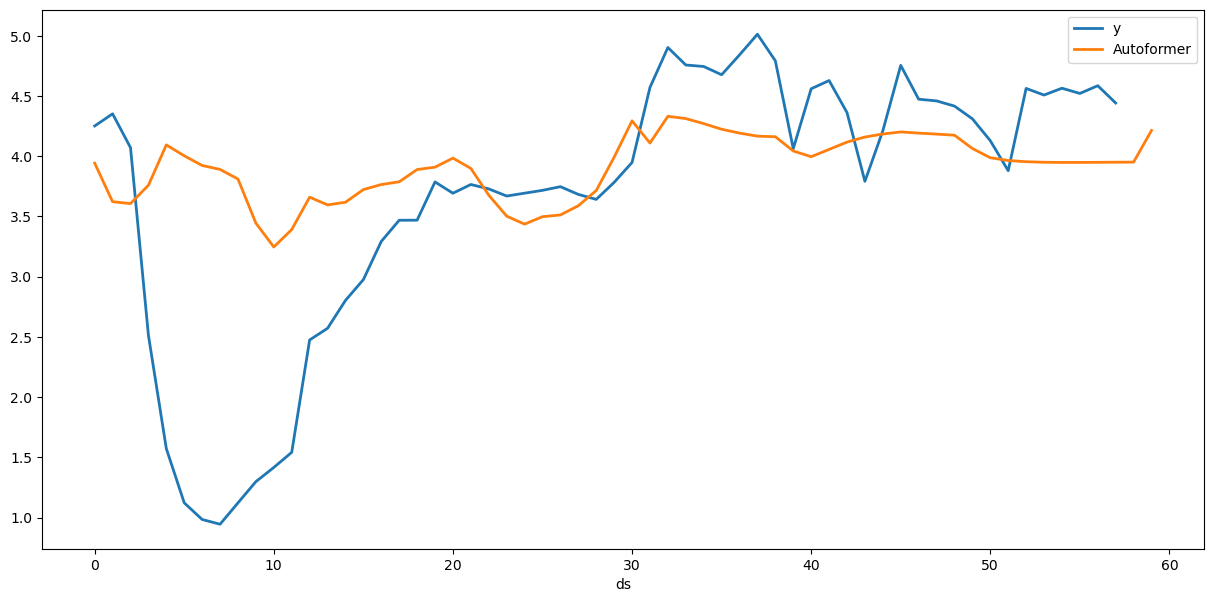

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
plot_df = forecasts.set_index('ds')
Y_test_df[['y']].plot(ax=ax,linewidth=2)
plot_df[[ 'Autoformer']].plot(ax=ax, linewidth=2)

In [ ]:
forecasts=forecasts.set_index('ds')
forecasts

,Autoformer
ds,
0,3.942657
1,3.622444
2,3.606966
3,3.759120
4,4.094151
5,4.003426
6,3.923312
7,3.890540
8,3.810695


In [ ]:
mae_autoformer = mae(Y_test_df['y'], forecasts['Autoformer'])
mse_autoformer = mse(Y_test_df['y'], forecasts['Autoformer'])
print(f'Autoformer MAE: {mae_autoformer:.3f}')
print(f'Autoformer MSE: {mse_autoformer:.3f}')

Autoformer MAE: 0.713
Autoformer MSE: 1.100
